In [1]:
import datetime
import json
import math
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import statsmodels as sm

%matplotlib inline

np.random.seed(123)
pylab.rcParams['figure.figsize'] = 6, 6
sns.set(font_scale=1.5)
sns.set_palette(sns.color_palette('muted'))
sns.set_style('whitegrid')

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [3]:
def f(x):
    return math.sin(x)
print f(math.pi / 2)

1.0


In [4]:
f_points = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
f_points['y'] = f_points.x.apply(f)

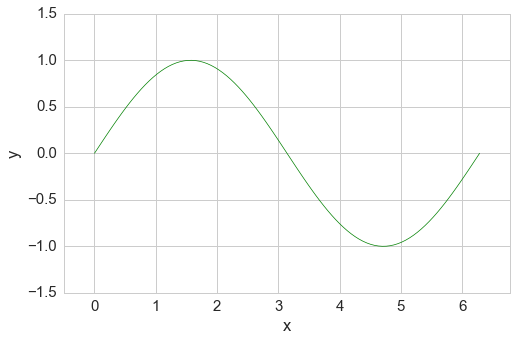

In [5]:
plt.figure(figsize=(8, 5))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7)
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')

In [6]:
num_points = 10

In [7]:
train = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
train['y'] = train.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

In [8]:
test = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
test['y'] = test.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

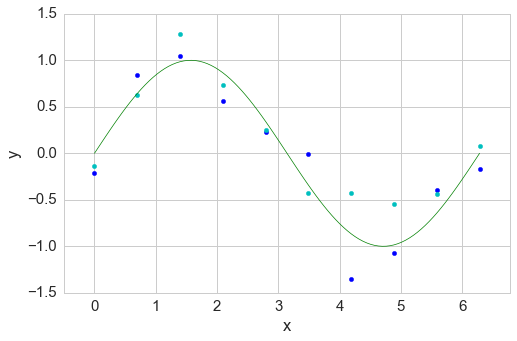

In [9]:
plt.figure(figsize=(8, 5))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7)
_ = plt.scatter(train.x, train.y, color='b', marker='o')
_ = plt.scatter(test.x, test.y, color='c', marker='o')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')

In [10]:
def error(x, y, poly):
    s = 0
    for i in range(len(y)):
        s += math.pow((y[i]-poly(x[i])), 2)
    return 0.5 * s

In [11]:
def regularized_error(x, y, poly, reg_coeff):
    s = 0
    for i in range(len(y)):
        s += math.pow((y[i]-poly(x[i])), 2)
    return 0.5 * s + 0.5 * reg_coeff * np.dot(poly, poly)

 
-0.2151 x + 0.6218

error on train:       1.73821789141
reg. error on train:  1.74038229525
error on test:        1.34600726236
reg. error on test:   1.3481716662


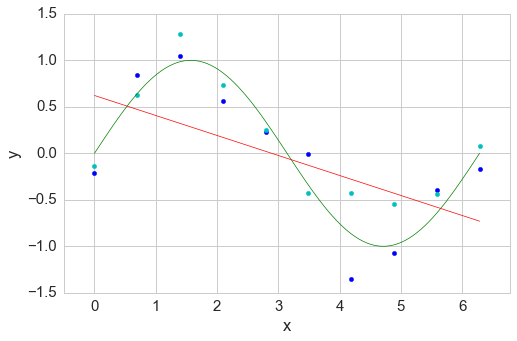

In [12]:
degree = 1
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print poly
print

print 'error on train:      ', error(train.x.values, train.y.values, poly)
print 'reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff)
print 'error on test:       ', error(test.x.values, test.y.values, poly)
print 'reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff)

plt.figure(figsize=(8, 5))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7)
_ = plt.scatter(train.x, train.y, color='b', marker='o')
_ = plt.scatter(test.x, test.y, color='c', marker='o')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=0.7)
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')

         3          2
0.08864 x - 0.8347 x + 1.772 x - 0.134

error on train:       0.333411144406
reg. error on train:  0.352721588573
error on test:        0.359645370022
reg. error on test:   0.378955814189


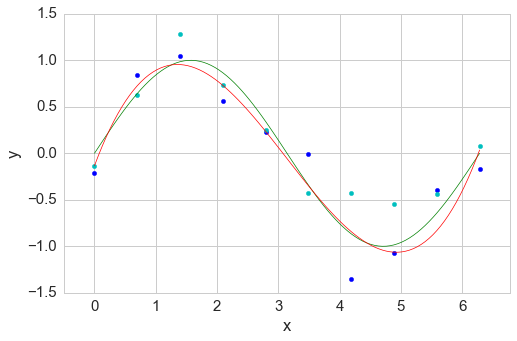

In [13]:
degree = 3
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print poly
print

print 'error on train:      ', error(train.x.values, train.y.values, poly)
print 'reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff)
print 'error on test:       ', error(test.x.values, test.y.values, poly)
print 'reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff)

plt.figure(figsize=(8, 5))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7)
_ = plt.scatter(train.x, train.y, color='b', marker='o')
_ = plt.scatter(test.x, test.y, color='c', marker='o')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=0.7)
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')

          9          8         7         6         5         4
0.004621 x - 0.1261 x + 1.434 x - 8.829 x + 31.93 x - 68.91 x
          3         2
 + 86.11 x - 57.29 x + 16.72 x - 0.2171

error on train:       7.54004997897e-21
reg. error on train:  84.1302569798
error on test:        0.757612824997
reg. error on test:   84.8878698048


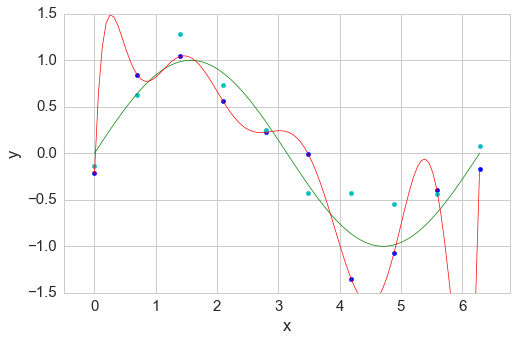

In [14]:
degree = 9
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print poly
print

print 'error on train:      ', error(train.x.values, train.y.values, poly)
print 'reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff)
print 'error on test:       ', error(test.x.values, test.y.values, poly)
print 'reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff)

plt.figure(figsize=(8, 5))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7)
_ = plt.scatter(train.x, train.y, color='b', marker='o')
_ = plt.scatter(test.x, test.y, color='c', marker='o')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=0.7)
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')

In [15]:
degrees = range(10)
reg_coeff = 0.01
train_errors = []
train_reg_errors = []
test_errors = []
test_reg_errors = []
for i in degrees:
    pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
    poly = np.poly1d(np.polyfit(train.x.values, train.y.values, i))
    pred['y'] = pred.x.apply(poly)
    train_errors.append(error(train.x.values, train.y.values, poly))
    train_reg_errors.append(regularized_error(train.x.values, train.y.values, poly, reg_coeff))
    test_errors.append(error(test.x.values, test.y.values, poly))
    test_reg_errors.append(regularized_error(test.x.values, test.y.values, poly, reg_coeff))

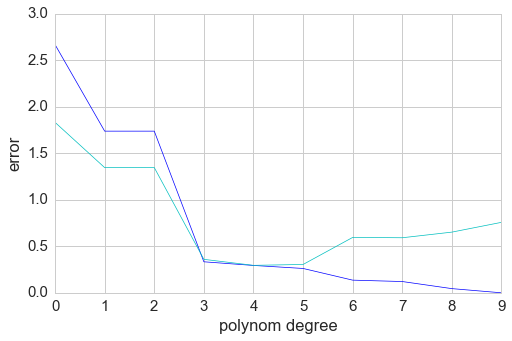

In [16]:
plt.figure(figsize=(8, 5))
_ = plt.plot(degrees, train_errors, 'b-', linewidth=0.7)
_ = plt.plot(degrees, test_errors, 'c-', linewidth=0.7)
_ = plt.xlabel('polynom degree')
_ = plt.ylabel('error')

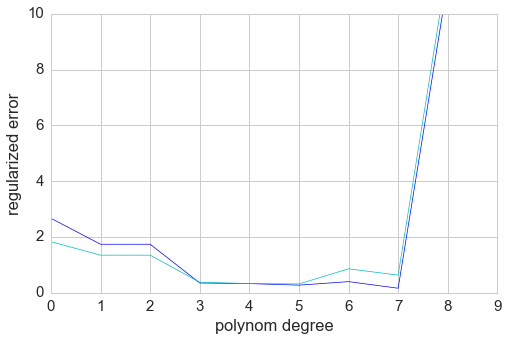

In [17]:
plt.figure(figsize=(8, 5))
_ = plt.plot(degrees, train_reg_errors, 'b-', linewidth=0.7)
_ = plt.plot(degrees, test_reg_errors, 'c-', linewidth=0.7)
_ = plt.xlim((0, 9))
_ = plt.ylim((0, 10))
_ = plt.xlabel('polynom degree')
_ = plt.ylabel('regularized error')